Задача mnist - распознавание рукописных цифр

In [1]:
# !pip install keras
# # датасет mnist
# !pip install mnist
# # связть библиотек keras и scisearch 
# !pip install scikeras[tensorflow]

In [2]:
import keras
from keras.layers import *
import matplotlib.pyplot as plt
import numpy as np
import keras.utils
import pandas as pd
import mnist
from sklearn.model_selection import train_test_split

In [3]:
df_mnist = mnist.train_images()

In [4]:
df_mnist.shape

(60000, 28, 28)

In [5]:
type(df_mnist)

numpy.ndarray

In [6]:
df_mnist[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

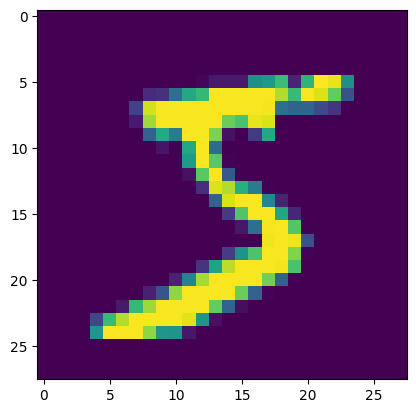

In [7]:
plt.imshow(df_mnist[0])

In [8]:
#x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
x_train = mnist.train_images()
x_test = mnist.test_images()
y_test = mnist.test_labels()
y_train = mnist.train_labels()
y_train[:15]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4, 3, 5, 3, 6, 1], dtype=uint8)

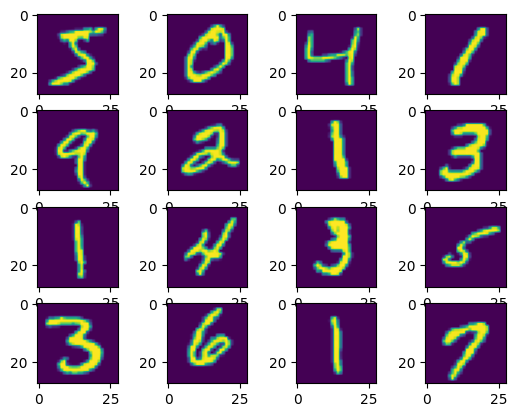

In [9]:
for i in range(16):
    plt.subplot(4,4,i+1)
    plt.imshow(x_train[i])
plt.show()

In [10]:
input_shape = (28, 28, 1) # данные 28 на 28 и 1 цветовой канал (серый), при цветном было бы 3

In [11]:
model_1 = keras.Sequential([
      keras.Input(shape=input_shape),     # рецепторы (прием информации)
      Flatten(),        # сглаживает - перводит два измерения в одно
      Dense(50),        # кол-во нейронов
      Dense(1)          # последний слой
      ] )

In [12]:
model_1.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

In [13]:
%%time

history = model_1.fit(df_mnist, y_train, batch_size=32, epochs=5)

Epoch 1/5


c:\Users\Lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\tensorflow\python\util\dispatch.py:1176: SyntaxWarning: In loss categorical_crossentropy, expected y_pred.shape to be (batch_size, num_classes) with num_classes > 1. Received: y_pred.shape=(32, 1). Consider using 'binary_crossentropy' if you only have 2 classes.
  return dispatch_target(*args, **kwargs)


1875/1875 [==============================] - 6s 3ms/step - loss: 5.3095e-07 - accuracy: 0.0942
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 5.3095e-07 - accuracy: 0.0942
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 5.3095e-07 - accuracy: 0.0942
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 5.3095e-07 - accuracy: 0.0942
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 5.3095e-07 - accuracy: 0.0942
CPU times: total: 45.8 s
Wall time: 25.9 s


In [14]:
# заменяем насыщенность цвета, приводя его в данным от 0 до 1
x_train = x_train / 255
x_test = x_test / 255

Приводим результаты действий к виду 00000001, где 10 - кол-во символов, а позиция единицы - это нужный нам ответ.
Например, после преобразования число 3 будет выглядеть как 0001000000

In [15]:
y_train_cat = keras.utils.to_categorical(y_train, 10)
y_test_cat = keras.utils.to_categorical(y_test, 10)

In [16]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [17]:
y_train_cat[:10]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [18]:
model_2 = keras.Sequential([
      keras.Input(shape=input_shape),
      Flatten(),
      Dense(50, activation = 'relu'),
      # соответственно у модели увеличиваем число выходных нейронов
      # и меняем функцию активации на softmax
      Dense(10, activation = 'softmax')
      ] )

In [19]:
model_2.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

In [20]:
%%time

history = model_2.fit(x_train, y_train_cat, batch_size=32, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 7s 3ms/step - loss: 0.3097 - accuracy: 0.9129
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1539 - accuracy: 0.9553
Epoch 3/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.1160 - accuracy: 0.9662
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0933 - accuracy: 0.9729
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0799 - accuracy: 0.9763
CPU times: total: 46.1 s
Wall time: 26.7 s


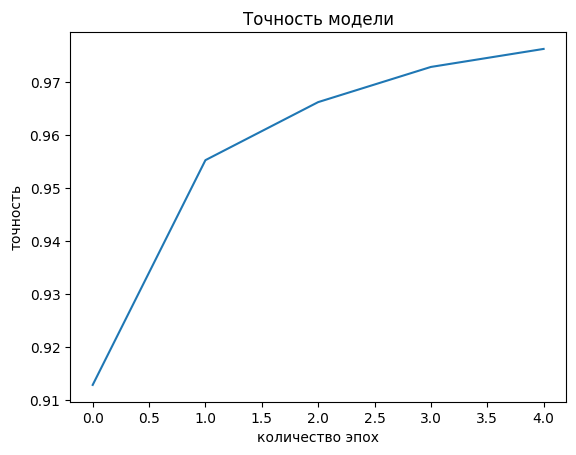

In [21]:
plt.plot(history.history['accuracy'])
plt.title('Точность модели')
plt.ylabel('точность')
plt.xlabel('количество эпох')
plt.show()

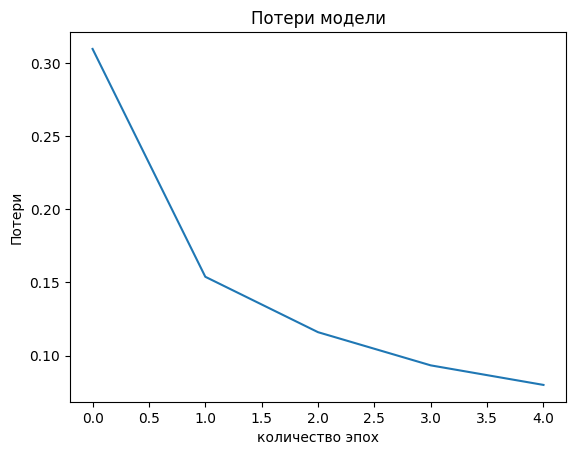

In [22]:
plt.plot(history.history['loss'])
plt.title('Потери модели')
plt.ylabel('Потери')
plt.xlabel('количество эпох')
plt.show()

In [27]:
model_2.evaluate(x_test, y_test_cat)

313/313 [==============================] - 1s 2ms/step - loss: 0.0953 - accuracy: 0.9720


[0.09532707184553146, 0.972000002861023]

In [28]:
%%time

history = model_2.fit(x_train, y_train_cat, batch_size=32, epochs=5, validation_data =(x_test, y_test_cat) )

Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0368 - accuracy: 0.9889 - val_loss: 0.0957 - val_accuracy: 0.9735
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0335 - accuracy: 0.9895 - val_loss: 0.0964 - val_accuracy: 0.9738
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0295 - accuracy: 0.9912 - val_loss: 0.0927 - val_accuracy: 0.9751
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0262 - accuracy: 0.9918 - val_loss: 0.0981 - val_accuracy: 0.9747
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0245 - accuracy: 0.9924 - val_loss: 0.1056 - val_accuracy: 0.9730
CPU times: total: 46.2 s
Wall time: 28.5 s


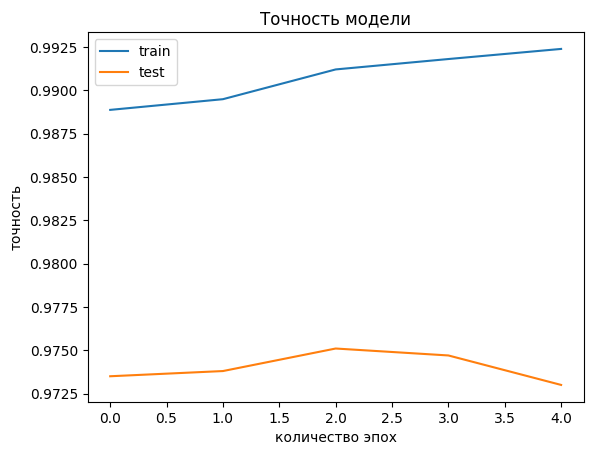

In [29]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Точность модели')
plt.ylabel('точность')
plt.xlabel('количество эпох')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


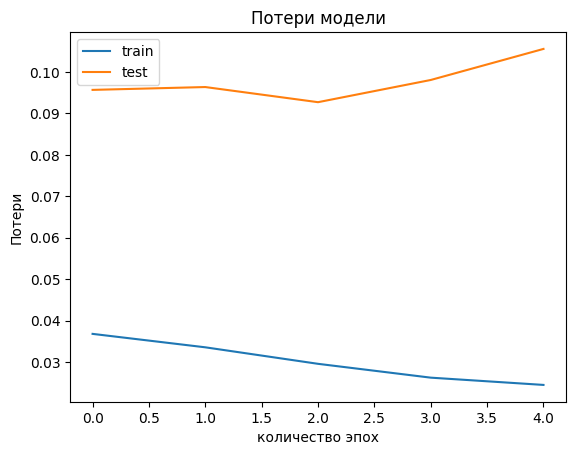

In [30]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Потери модели')
plt.ylabel('Потери')
plt.xlabel('количество эпох')
plt.legend(['train', 'test'], loc='upper left')
plt.show()